In [1]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    e_x = np.exp(x - np.max(x))  # subtracting np.max(x) for numerical stability
    return e_x / e_x.sum(axis=-1, keepdims=True)

def display_avg_attention_scores(filenames):
    num_files = len(filenames)
    
    # Determine the grid size for subplots
    cols = 3  # for example, 3 columns
    rows = int(np.ceil(num_files / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    
    # If there's only one row, axes is a 1D array
    if rows == 1:
        axes = np.expand_dims(axes, axis=0)
    
    for idx, filename in enumerate(filenames):
        try:
            # Load the raw attention scores
            raw_scores = np.load(filename, allow_pickle=True)
            
            # Apply softmax to get attention weights
            attention_weights = softmax(raw_scores)

            # Calculate the average attention weights across all samples (or timesteps T)
            avg_weights = np.mean(attention_weights, axis=0)
        except:
            print(f'Error loading attention scores from {filename}')
            continue

        # Display the averaged attention weights in a subplot
        ax = axes[idx // cols, idx % cols]
        cax = ax.imshow(avg_weights, cmap='viridis')
        ax.set_title(f'Head {idx}')
        ax.set_xlabel('Target Token Position')
        ax.set_ylabel('Source Token Position')
        
        # Add a colorbar for each subplot
        fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
    
    # Remove any remaining empty subplots
    for j in range(idx+1, rows*cols):
        fig.delaxes(axes.flatten()[j])
    
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_1300835/2409502569.py:6: RuntimeWarning: invalid value encountered in divide
  return e_x / e_x.sum(axis=-1, keepdims=True)


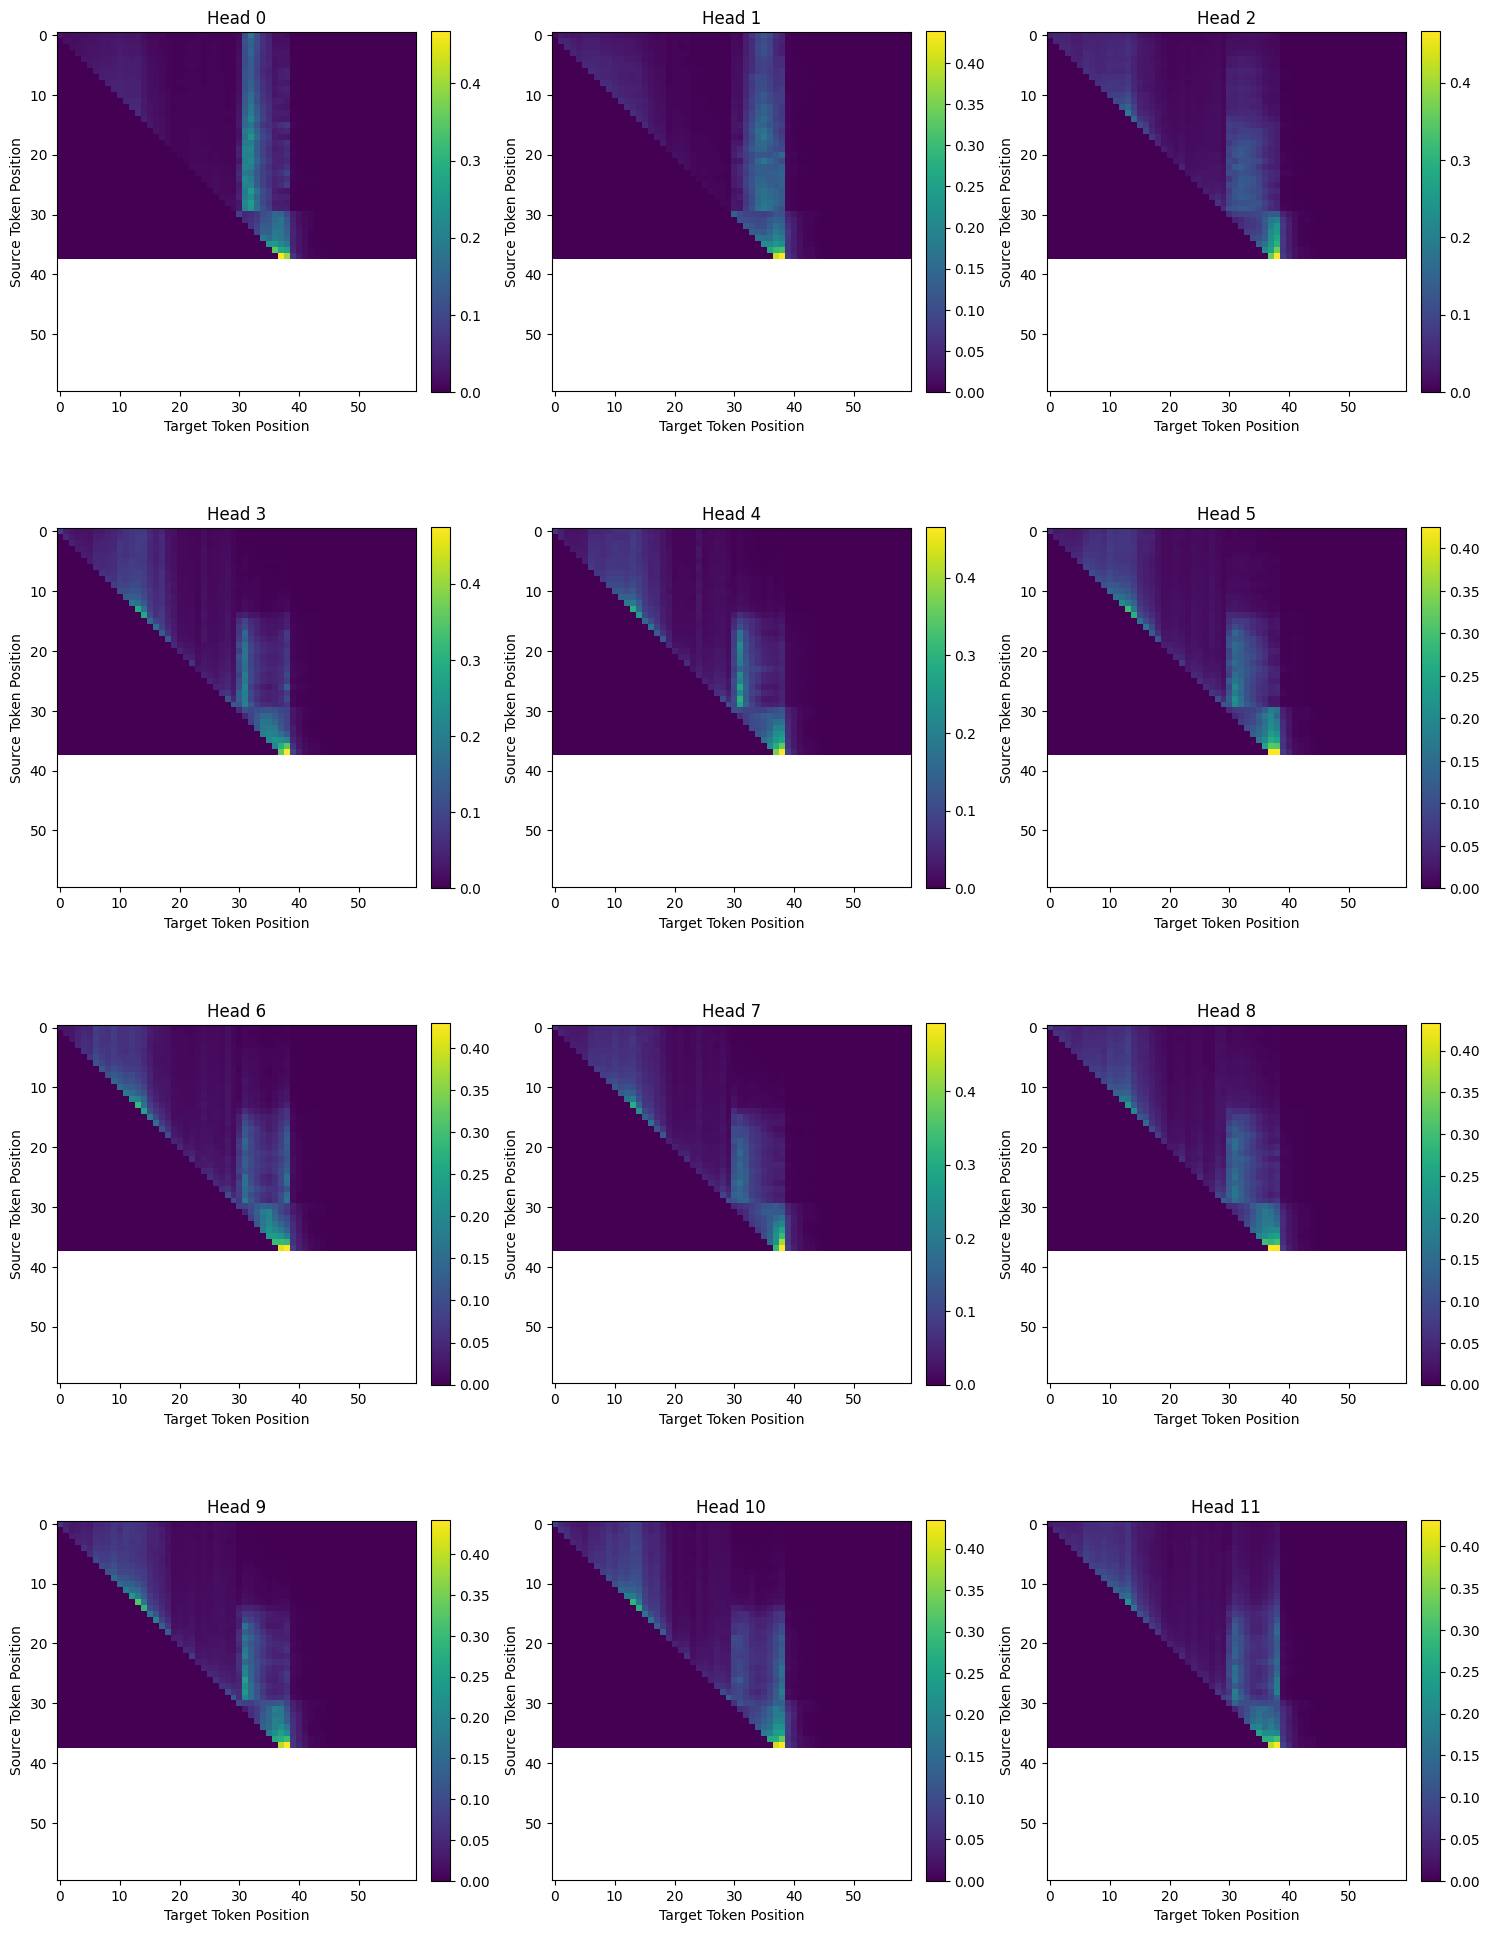

In [2]:
import os

save_dir = 'attention_scores'
filepaths = [os.path.join(save_dir, f"cross_attention_layer_0_head_{i}.npy") for i in range(12)]  # assuming 12 layers
display_avg_attention_scores(filepaths)


/tmp/ipykernel_1300835/2409502569.py:6: RuntimeWarning: invalid value encountered in divide
  return e_x / e_x.sum(axis=-1, keepdims=True)


Error loading attention scores from attention_scores/cross_attention_layer_1_head_7.npy


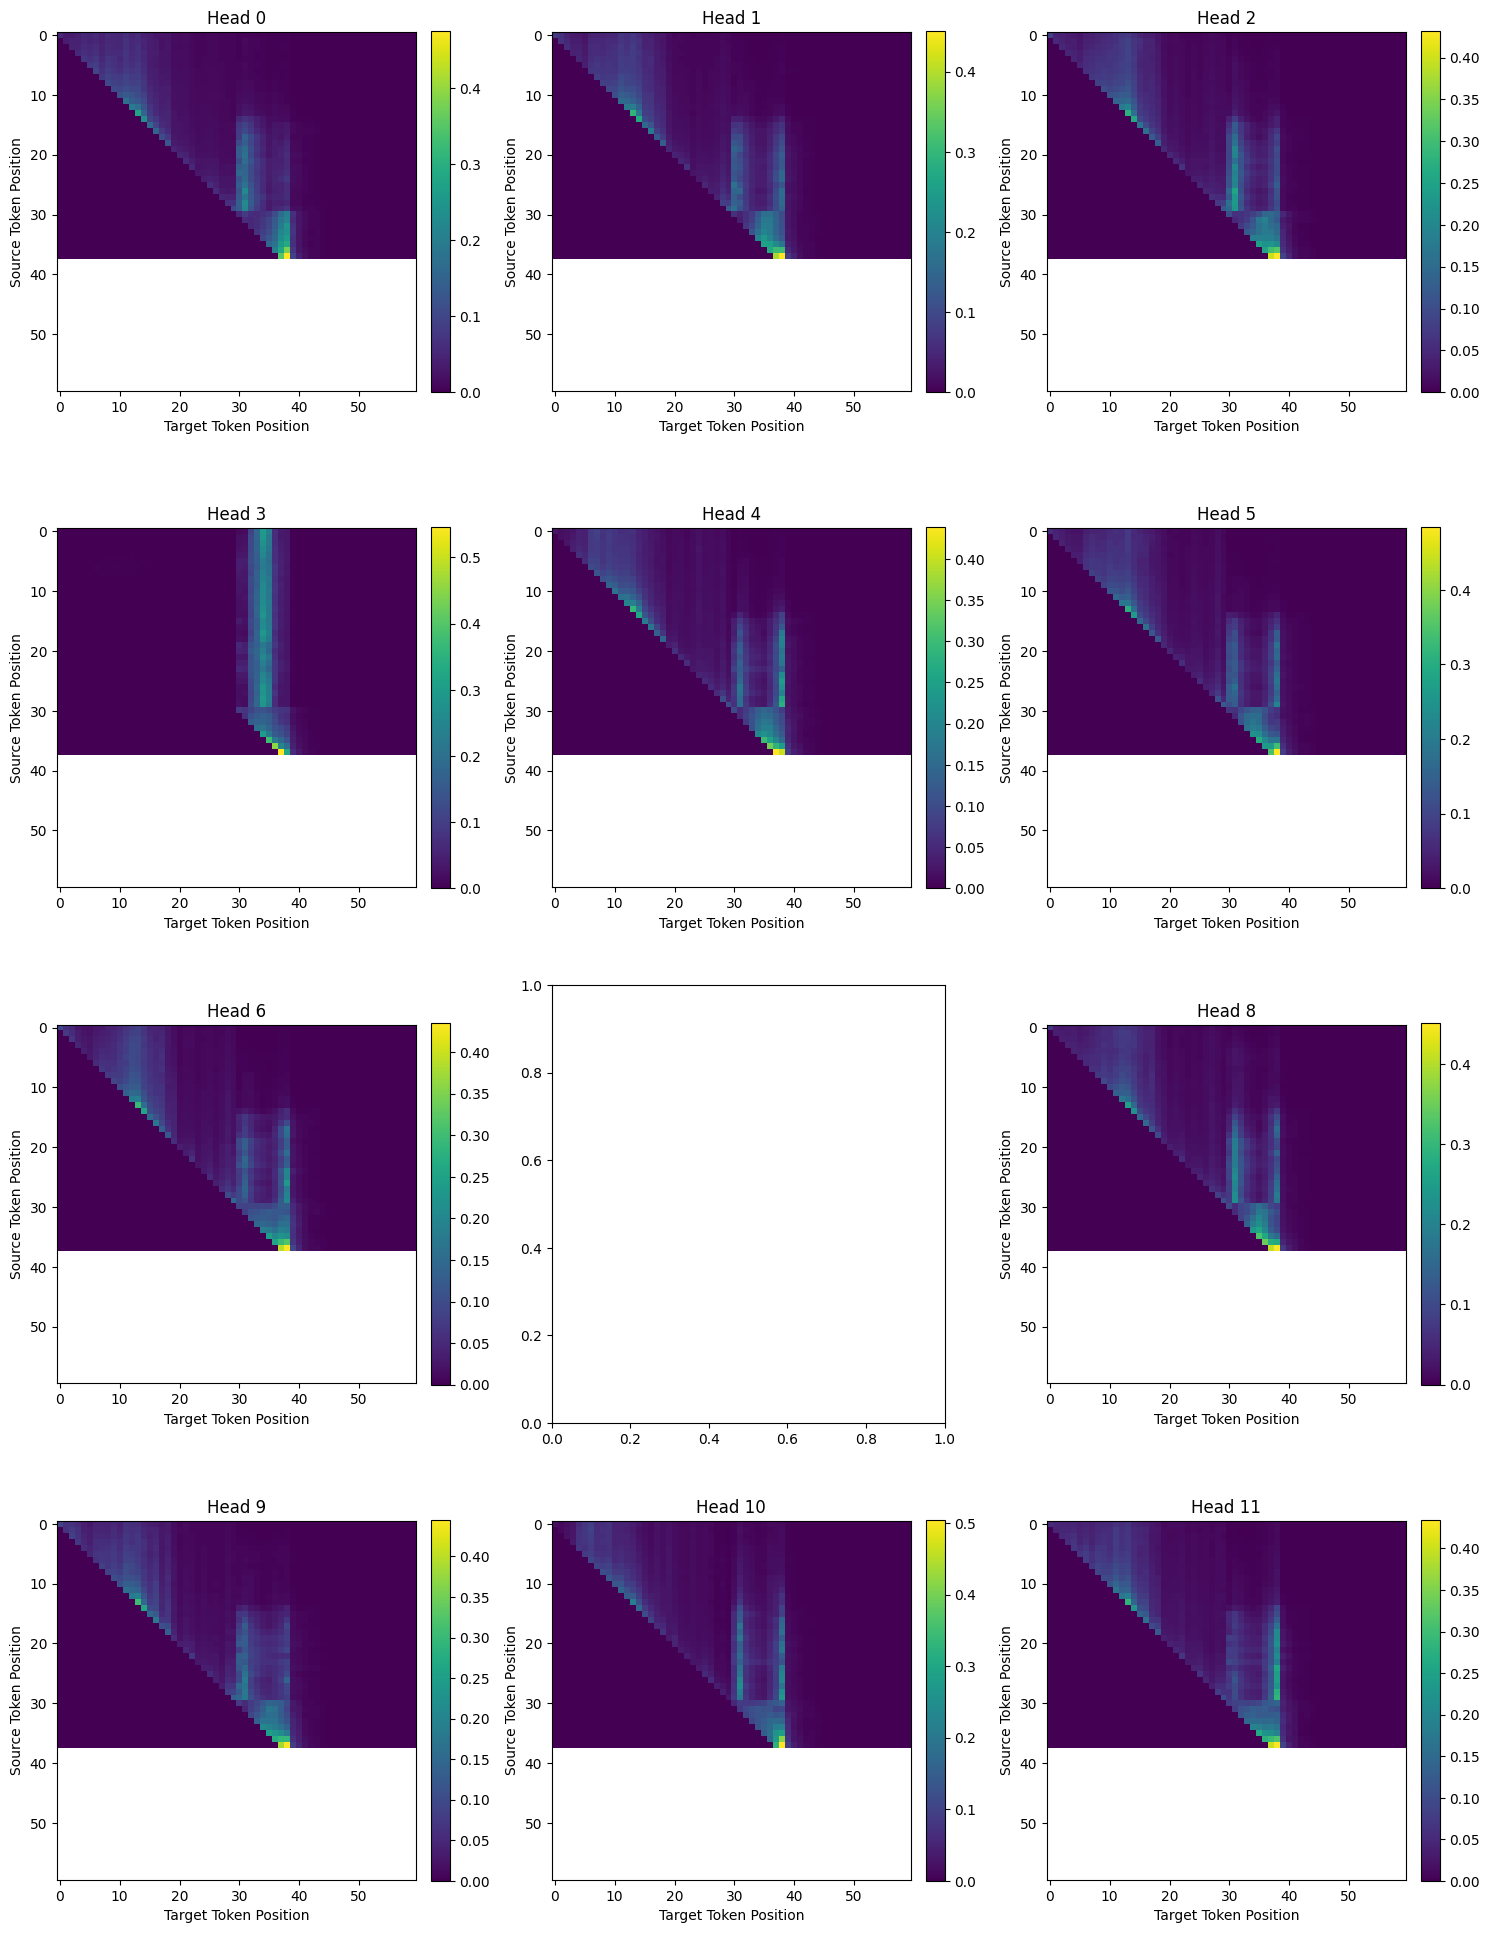

In [3]:
filepaths = [os.path.join(save_dir, f"cross_attention_layer_1_head_{i}.npy") for i in range(12)]  # assuming 12 layers
display_avg_attention_scores(filepaths)

/tmp/ipykernel_1300835/2409502569.py:6: RuntimeWarning: invalid value encountered in divide
  return e_x / e_x.sum(axis=-1, keepdims=True)


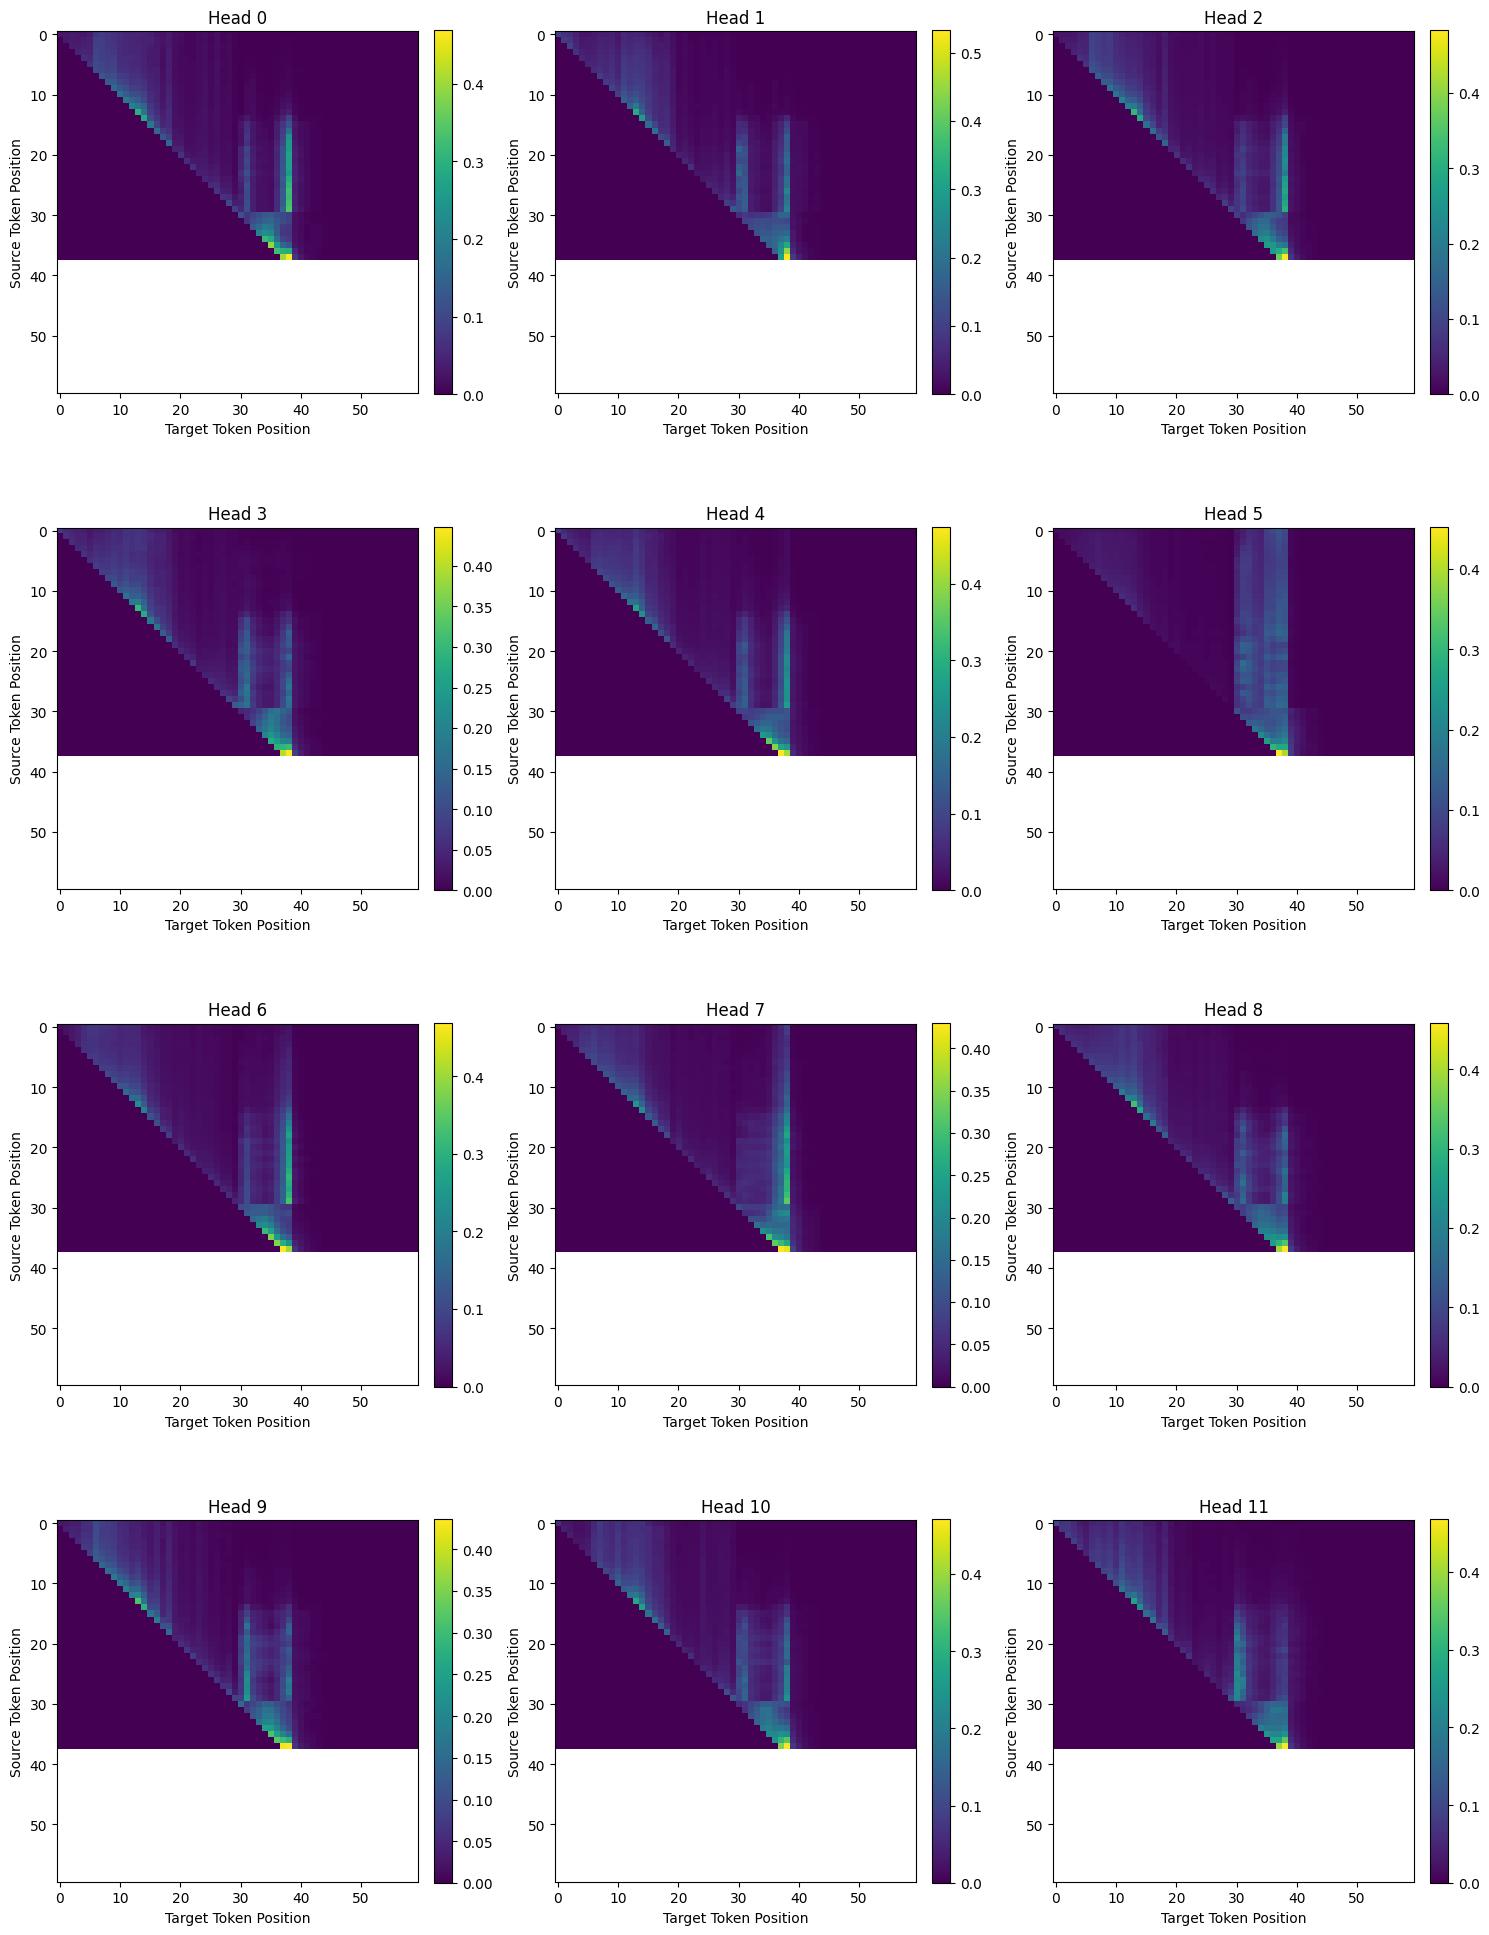

In [4]:
filepaths = [os.path.join(save_dir, f"cross_attention_layer_2_head_{i}.npy") for i in range(12)]  # assuming 12 layers
display_avg_attention_scores(filepaths)